In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


In [21]:
df=pd.read_csv(r"C:\Users\arshi\Downloads\force2020_data_unsupervised_learning (1).csv",index_col='DEPTH_MD')
df.head()

,RHOB,GR,NPHI,PEF,DTC
DEPTH_MD,,,,,
494.528,1.884186,80.200851,NaN,20.915468,161.131180
494.680,1.889794,79.262886,NaN,19.383013,160.603470
494.832,1.896523,74.821999,NaN,22.591518,160.173615
494.984,1.891913,72.878922,NaN,32.191910,160.149429
495.136,1.880034,71.729141,NaN,38.495632,160.128342


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18270 entries, 494.528 to 3272.024000000001
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RHOB    18270 non-null  float64
 1   GR      18270 non-null  float64
 2   NPHI    14032 non-null  float64
 3   PEF     16440 non-null  float64
 4   DTC     18189 non-null  float64
dtypes: float64(5)
memory usage: 856.4 KB


In [25]:
df.shape

(18270, 5)

In [27]:
df.isna().sum()

RHOB       0
GR         0
NPHI    4238
PEF     1830
DTC       81
dtype: int64

In [29]:
df.dropna(inplace=True)

In [31]:
df.describe()

,RHOB,GR,NPHI,PEF,DTC
count,12202.000000,12202.000000,12202.000000,12202.000000,12202.000000
mean,2.149947,61.253852,0.414572,3.912313,121.409905
std,0.251592,29.902708,0.139207,1.816933,30.394369
min,1.493417,6.191506,0.037976,1.126667,55.726753
25%,1.983767,42.792794,0.313797,2.629141,89.977041
50%,2.059335,62.886322,0.466891,3.365132,138.477173
75%,2.389839,77.726776,0.513840,4.686422,146.242302
max,2.889454,499.022583,0.800262,17.026619,163.910797


In [33]:
scaler=StandardScaler()

In [35]:
df.columns

Index(['RHOB', 'GR', 'NPHI', 'PEF', 'DTC'], dtype='object')

In [37]:
df[['RHOB_T', 'GR_T', 'NPHI_T', 'PEF_T', 'DTC_T']]=scaler.fit_transform(df[['RHOB', 'GR', 'NPHI', 'PEF', 'DTC']])

In [39]:
df.head()

,RHOB,GR,NPHI,PEF,DTC,RHOB_T,GR_T,NPHI_T,PEF_T,DTC_T
DEPTH_MD,,,,,,,,,,
1138.704,1.774626,55.892757,0.765867,1.631495,147.837677,-1.491843,-0.179292,2.523654,-1.255364,0.869531
1138.856,1.800986,60.929138,0.800262,1.645080,142.382431,-1.387067,-0.010859,2.770744,-1.247886,0.690042
1139.008,1.817696,62.117264,0.765957,1.645873,138.258331,-1.320646,0.028875,2.524300,-1.247450,0.554350
1139.160,1.829333,61.010860,0.702521,1.620216,139.198914,-1.274390,-0.008126,2.068584,-1.261572,0.585297
1139.312,1.813854,58.501236,0.639708,1.504854,144.290085,-1.335919,-0.092056,1.617342,-1.325067,0.752808


In [41]:
def optimize_k_means(data,max_k):
    means=[]
    inertias=[]

    for k in range(1,max_k):
        kmeans=KMeans(n_clusters=k)
        kmeans.fit(data)

        means.append(k)
        inertias.append(kmeans.inertia_)

    fig=plt.subplots(figsize=(10,5))
    plt.plot(means,inertias,'o-')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')
    plt.grid(True)
    plt.show()

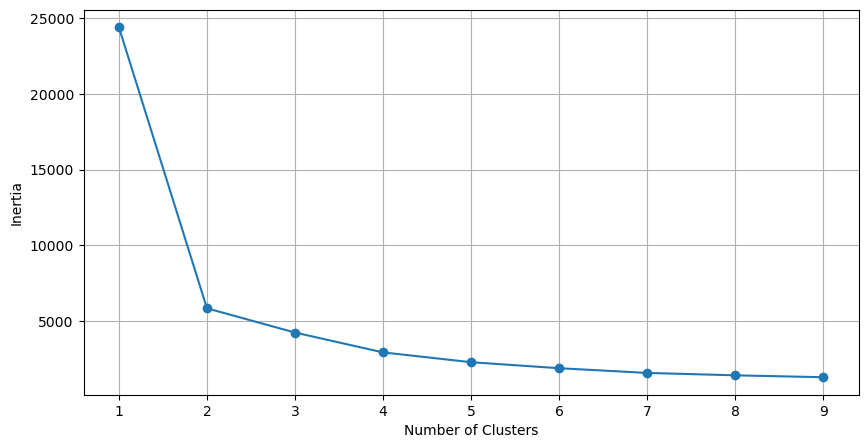

In [43]:
optimize_k_means(df[['RHOB_T','NPHI_T']],10)

In [45]:
kmeans=KMeans(n_clusters=3)

In [47]:
kmeans.fit(df[['NPHI_T','RHOB_T']])

KMeans(n_clusters=3)

In [49]:
df['kmeans_3']=kmeans.labels_

In [51]:
df

,RHOB,GR,NPHI,PEF,DTC,RHOB_T,GR_T,NPHI_T,PEF_T,DTC_T,kmeans_3
DEPTH_MD,,,,,,,,,,,
1138.704,1.774626,55.892757,0.765867,1.631495,147.837677,-1.491843,-0.179292,2.523654,-1.255364,0.869531,1
1138.856,1.800986,60.929138,0.800262,1.645080,142.382431,-1.387067,-0.010859,2.770744,-1.247886,0.690042,1
1139.008,1.817696,62.117264,0.765957,1.645873,138.258331,-1.320646,0.028875,2.524300,-1.247450,0.554350,1
1139.160,1.829333,61.010860,0.702521,1.620216,139.198914,-1.274390,-0.008126,2.068584,-1.261572,0.585297,1
1139.312,1.813854,58.501236,0.639708,1.504854,144.290085,-1.335919,-0.092056,1.617342,-1.325067,0.752808,1
...,...,...,...,...,...,...,...,...,...,...,...
2993.256,2.468236,90.537521,0.341534,4.699200,86.474564,1.265151,0.979338,-0.524699,0.433103,-1.149449,0
2993.408,2.457519,88.819122,0.351085,4.699200,86.187599,1.222550,0.921870,-0.456081,0.433103,-1.158891,0
2993.560,2.429228,92.128922,0.364982,4.699200,87.797836,1.110101,1.032560,-0.356250,0.433103,-1.105910,0


In [53]:
# plotting the results

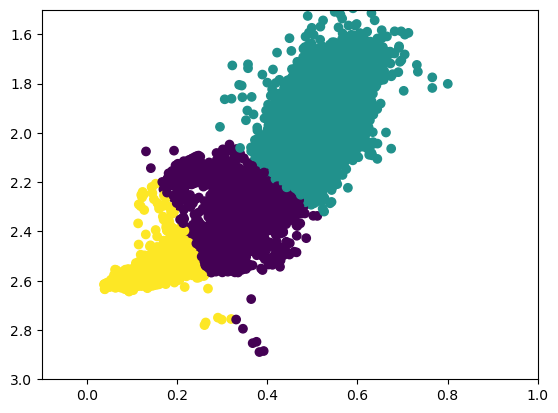

In [57]:
plt.scatter(x=df['NPHI'],y=df['RHOB'],c=df['kmeans_3'])
plt.xlim(-0.1,1)
plt.ylim(3,1.5)
plt.show()

In [59]:
for k in range(1,6):
    kmeans=KMeans(n_clusters=k)
    kmeans.fit(df[['RHOB_T','NPHI_T']])
    df[f'KMeans_{k}']=kmeans.labels_
    

In [61]:
df.head()

,RHOB,GR,NPHI,PEF,DTC,RHOB_T,GR_T,NPHI_T,PEF_T,DTC_T,kmeans_3,KMeans_1,KMeans_2,KMeans_3,KMeans_4,KMeans_5
DEPTH_MD,,,,,,,,,,,,,,,,
1138.704,1.774626,55.892757,0.765867,1.631495,147.837677,-1.491843,-0.179292,2.523654,-1.255364,0.869531,1,0,0,2,0,3
1138.856,1.800986,60.929138,0.800262,1.645080,142.382431,-1.387067,-0.010859,2.770744,-1.247886,0.690042,1,0,0,2,0,3
1139.008,1.817696,62.117264,0.765957,1.645873,138.258331,-1.320646,0.028875,2.524300,-1.247450,0.554350,1,0,0,2,0,3
1139.160,1.829333,61.010860,0.702521,1.620216,139.198914,-1.274390,-0.008126,2.068584,-1.261572,0.585297,1,0,0,2,0,3
1139.312,1.813854,58.501236,0.639708,1.504854,144.290085,-1.335919,-0.092056,1.617342,-1.325067,0.752808,1,0,0,2,0,3


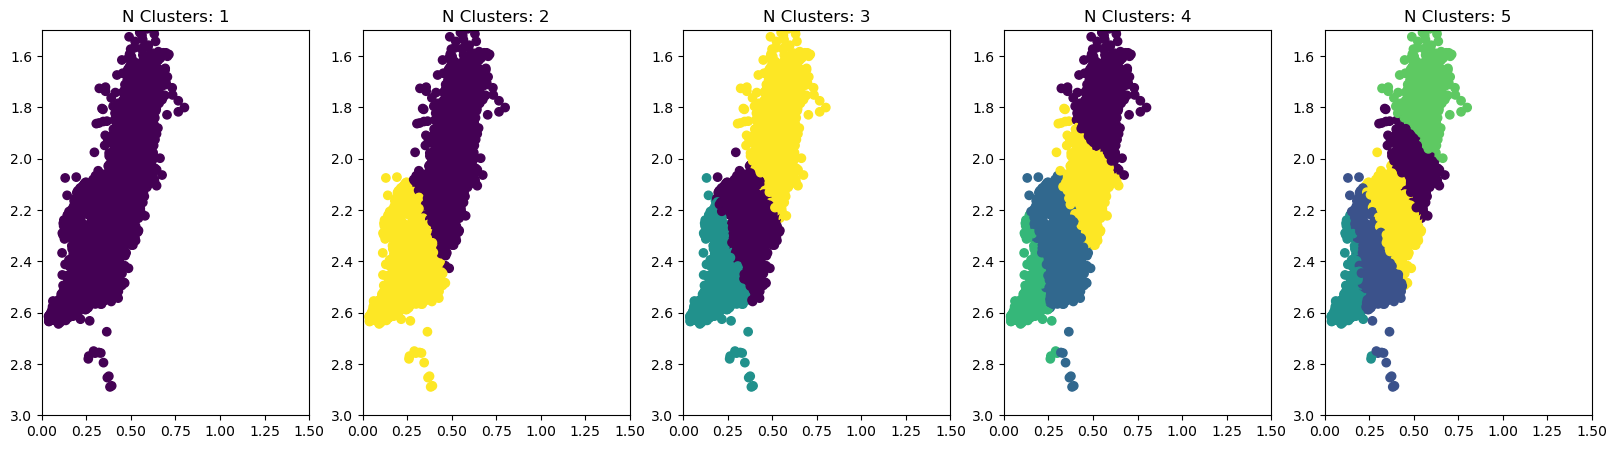

In [63]:
fig,axs=plt.subplots(nrows=1,ncols=5,figsize=(20,5))

for i , ax in enumerate(fig.axes,start=1):
    ax.scatter(x=df['NPHI'],y=df['RHOB'],c=df[f'KMeans_{i}'])
    ax.set_ylim(3,1.5)
    ax.set_xlim(0,1.5)
    ax.set_title(f'N Clusters: {i}')